[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Classification Report (Validation Data):
              precision    recall  f1-score   support

    negative       1.00      0.60      0.75        10
     neutral       0.92      0.96      0.94        25
    positive       0.91      0.98      0.94        52
  positive         0.00      0.00      0.00         1

    accuracy                           0.92        88
   macro avg       0.71      0.64      0.66        88
weighted avg       0.91      0.92      0.91        88

Confusion Matrix (Validation Data):
[[ 6  1  3  0]
 [ 0 24  1  0]
 [ 0  1 51  0]
 [ 0  0  1  0]]
Akurasi pada Data Validasi: 92.05%
Classification Report (Test Data):
              precision    recall  f1-score   support

    negative       0.82      0.90      0.86        10
     neutral       0.90      0.97      0.93        29
    positive       1.00      0.96      0.98        71

    accuracy                           0.95       110
   macro avg       0.91      0.94      0.92       110
weighted avg       0.96      0.

c:\Users\user\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


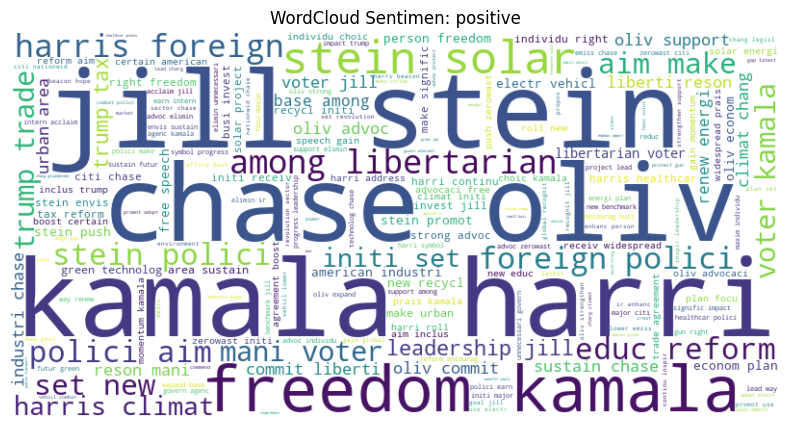

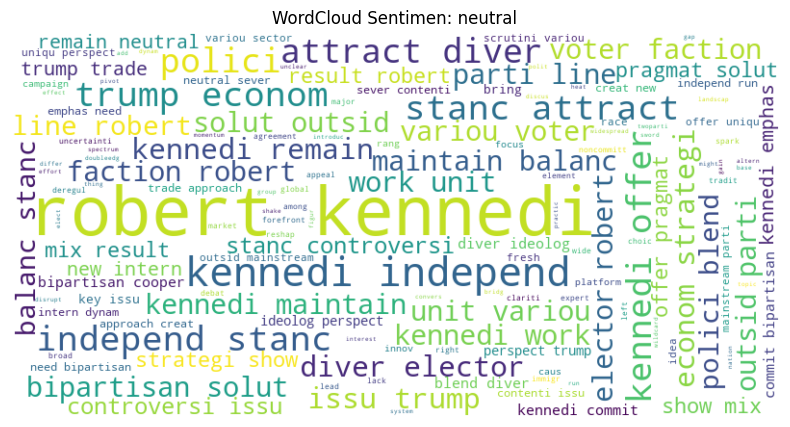

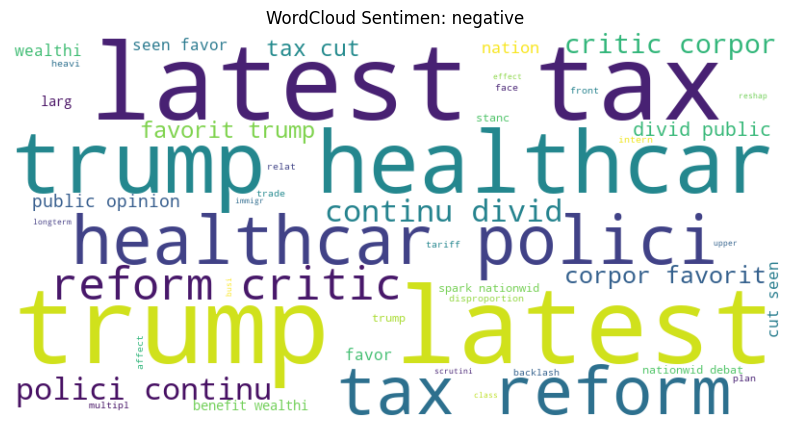

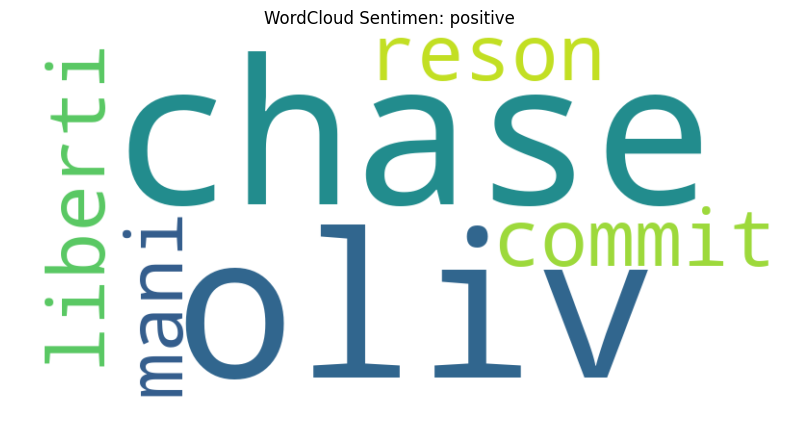

Distribusi Sentimen:
sentiment
positive      362
neutral       139
negative       48
positive        1
Name: count, dtype: int64


In [23]:
# a. Import library yang digunakan
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# b. Membaca dataset (gabungkan train dan val dataset)
train_data = pd.read_csv("train.csv")
val_data = pd.read_csv("val.csv")
data = pd.concat([train_data, val_data], ignore_index=True)

# c. Preprocessing data
# Asumsi: Kolom teks berada di kolom bernama 'tweet_text' dan label sentimen di kolom 'sentiment'
if 'tweet_text' not in data.columns or 'sentiment' not in data.columns:
    raise ValueError("Kolom 'tweet_text' atau 'sentiment' tidak ditemukan dalam dataset.")

# Menghapus baris kosong
data = data.dropna(subset=['tweet_text', 'sentiment'])

# Membersihkan teks
data['cleaned_text'] = data['tweet_text'].str.lower()  # Mengubah ke huruf kecil
data['cleaned_text'] = data['cleaned_text'].str.replace(r'[^\w\s]', '', regex=True)  # Menghapus tanda baca

# Menghapus stop words
stop_words = set(stopwords.words('english'))
data['cleaned_text'] = data['cleaned_text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

# Stemming
stemmer = PorterStemmer()
data['cleaned_text'] = data['cleaned_text'].apply(lambda x: ' '.join(stemmer.stem(word) for word in x.split()))

# Lemmatization
lemmatizer = WordNetLemmatizer()
data['cleaned_text'] = data['cleaned_text'].apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in x.split()))

# d. Mengubah teks menjadi fitur numerik menggunakan TF-IDF
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(data['cleaned_text'])

# e. Standarisasi data
scaler = StandardScaler(with_mean=False)  # TF-IDF tidak mendukung mean subtraction
X_scaled = scaler.fit_transform(X)

# f. Split data untuk training, validasi, dan testing
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, data['sentiment'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# g. Membuat dan melatih model K-NN
k_neighbors = 5
knn = KNeighborsClassifier(n_neighbors=k_neighbors)
knn.fit(X_train, y_train)

# Evaluasi model pada data validasi
y_val_pred = knn.predict(X_val)
print("Classification Report (Validation Data):")
print(classification_report(y_val, y_val_pred))
print("Confusion Matrix (Validation Data):")
print(confusion_matrix(y_val, y_val_pred))

# Menghitung akurasi pada data validasi
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Akurasi pada Data Validasi: {val_accuracy * 100:.2f}%")

# h. Evaluasi model pada data test
y_test_pred = knn.predict(X_test)
print("Classification Report (Test Data):")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_test_pred))

# Menghitung akurasi pada data test
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Akurasi pada Data Test: {test_accuracy * 100:.2f}%")

# i. Visualisasi WordCloud berdasarkan sentimen
for sentiment in data['sentiment'].unique():
    sentiment_text = " ".join(data[data['sentiment'] == sentiment]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sentiment_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud Sentimen: {sentiment}")
    plt.show()

# j. Distribusi data
print("Distribusi Sentimen:")
print(data['sentiment'].value_counts())
